### Hypothesis Testing

- classical p-value
- sequential A/B testing

E - conversion rate for exposed group

C - conversion rate for control group - baseline conversion

In [1]:


import imp
import sys
import os
import pandas as pd
import numpy as np
import math
from math import factorial

sys.path.append(os.path.abspath(os.path.join("../scripts")))
from DistributionPlots import DistributionPlots
DP = DistributionPlots()

from ABTestingFunctions import ABTesting
ABT = ABTesting()

import data_loader
import ploting_utils
import hypothesis_test


/Users/user/miniforge3/envs/10A/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = data_loader.load_data('../data/AdSmartABdata.csv')


In [3]:
ddf = df.groupby('experiment').agg(
    {'auction_id': 'count', 'yes': 'sum', 'no': 'sum'}).reset_index()
ddf = ddf.rename(columns={'auction_id': 'total'})
ddf


,experiment,total,yes,no
0,control,4071,264,322
1,exposed,4006,308,349


In [4]:
C_total = ddf.total.iloc[0]
E_total = ddf.total.iloc[1]

In [5]:
C_aware = ddf.yes.iloc[0]
E_aware = ddf.yes.iloc[1]


In [6]:
C_cr = ddf.yes.iloc[0]/ddf.total.iloc[0]
E_cr = ddf.yes.iloc[1]/ddf.total.iloc[1]

print('convertion rate for contro gruop = {}%'.format(C_cr))
print('convertion rate for exposed gruop = {}%'.format(E_cr))


convertion rate for contro gruop = 0.06484893146647015%
convertion rate for exposed gruop = 0.07688467299051423%


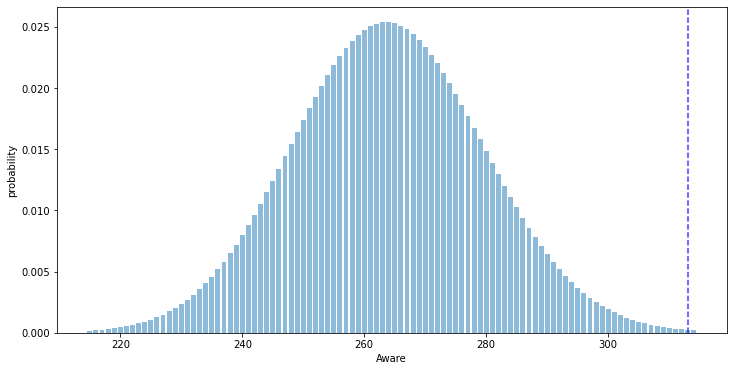

In [7]:
#control group distribution with probability of getting the result from our exposed group
DP.cont_distribution(C_aware, C_total, C_cr, E_cr)

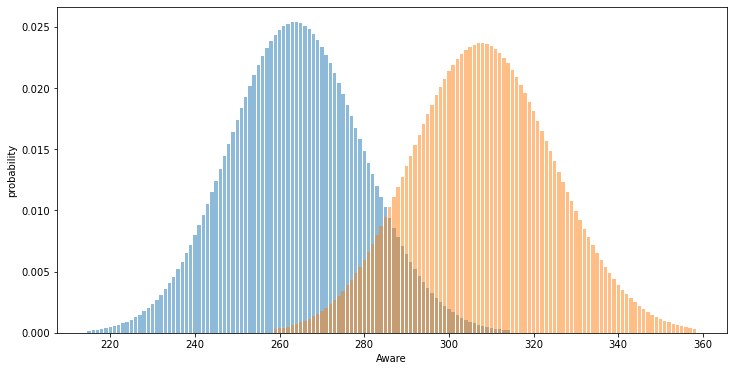

In [8]:
#comparison of control and exposed groups distribution against each other
DP.cont_exp_distribution(C_aware, E_aware, C_total, E_total, C_cr, E_cr)

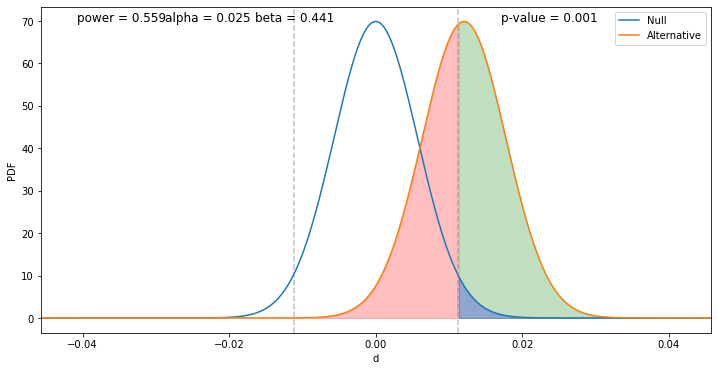

In [9]:
#Null and alternative hypotheses plots with
#statistical power and significance levels defined and represented in the plots
DP.null_alt_distribution(C_total, E_total, C_cr, E_cr)

## classical p-value

In [10]:
zscore, pvalue = hypothesis_test.two_proprotions_test(
    ddf.yes.iloc[0], ddf.total.iloc[0],  ddf.yes.iloc[1], ddf.total.iloc[1])
print('zscore = {:.3f}, pvalue = {:.3f}'.format(zscore, pvalue))



zscore = 2.108, pvalue = 0.035


***Assuming 95% confidence level, the new advertising is more successful.
p_vlaue = 0.035*** 

# sequential

In [15]:

from ctypes import c_wchar
import numpy as np

print('E-C = {}'.format(E_aware-C_aware))
print('E+C = {}'.format(E_aware+C_aware))
print('N = {}'.format(ddf.total.sum()))
print('2*sqrt(N) = {}'.format(2*np.sqrt(ddf.total.sum())))


E-C = 44
E+C = 572
N = 8077
2*sqrt(N) = 179.74426277353055
